In [1]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

C:\Users\Shahzad Ahsan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Loading Dataset

In [2]:
dataframe = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
dataframe

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
dataset = dataframe.values

# Checking Shape of Data

In [5]:
dataframe.shape

(500, 9)

In [6]:
print(dataset[:,1:8])

[[337.   118.     4.   ...   4.5    9.65   1.  ]
 [324.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   120.     5.   ...   5.     9.56   1.  ]
 [312.   103.     4.   ...   5.     8.43   0.  ]
 [327.   113.     4.   ...   4.5    9.04   0.  ]]


In [7]:
complete_data = dataset.copy()
data = complete_data[:,1:8]
labels = complete_data[:,8]
train_data = data[:400]
train_labels = labels[:400]
test_data = data[400:]
test_labels = labels[400:]


# Normalizing the Data

In [8]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

# Build Network

In [9]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(34, activation='sigmoid',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(9, activation='sigmoid'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# Validation Step : Using K-fold Cross-Validation Method

In [10]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [11]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate( [train_labels[:i * num_val_samples], train_labels[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
Epoch 1/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0584
Epoch 2/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0034 - mean_absolute_error: 0.0460
Epoch 3/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0034 - mean_absolute_error: 0.0430
Epoch 4/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0031 - mean_absolute_error: 0.0415
Epoch 5/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_absolute_error: 0.0413
Epoch 6/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0031 - mean_absolute_error: 0.0416
Epoch 7/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0030 - mean_absolute_error: 0.0409
Epoch 8/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0030 - mean_absolute_error: 0.0407
Epoch 9/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0029 - 

300/300 [==============================] - 0s 1ms/step - loss: 0.0026 - mean_absolute_error: 0.0384
Epoch 74/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0025 - mean_absolute_error: 0.0363
Epoch 75/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0027 - mean_absolute_error: 0.0378
Epoch 76/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0025 - mean_absolute_error: 0.0376
Epoch 77/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0026 - mean_absolute_error: 0.0379
Epoch 78/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0025 - mean_absolute_error: 0.0362
Epoch 79/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0026 - mean_absolute_error: 0.0373
Epoch 80/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0025 - mean_absolute_error: 0.0373
Epoch 81/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0026 - mean_absolute_error: 0.0

300/300 [==============================] - 0s 923us/step - loss: 0.0047 - mean_absolute_error: 0.0503
Epoch 46/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0046 - mean_absolute_error: 0.0505
Epoch 47/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0047 - mean_absolute_error: 0.0496
Epoch 48/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0048 - mean_absolute_error: 0.0504
Epoch 49/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0048 - mean_absolute_error: 0.0512
Epoch 50/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0047 - mean_absolute_error: 0.0501
Epoch 51/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0047 - mean_absolute_error: 0.0498
Epoch 52/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0048 - mean_absolute_error: 0.0498
Epoch 53/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0046 - mean_absolute_error: 0

300/300 [==============================] - 0s 1ms/step - loss: 0.0053 - mean_absolute_error: 0.0544
Epoch 18/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0055 - mean_absolute_error: 0.0546
Epoch 19/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0055 - mean_absolute_error: 0.0536
Epoch 20/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0055 - mean_absolute_error: 0.0560
Epoch 21/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0055 - mean_absolute_error: 0.0545
Epoch 22/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0055 - mean_absolute_error: 0.0550
Epoch 23/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0053 - mean_absolute_error: 0.0547
Epoch 24/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0053 - mean_absolute_error: 0.0534
Epoch 25/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0055 - mean_absolute_error: 0.0

300/300 [==============================] - 0s 1ms/step - loss: 0.0051 - mean_absolute_error: 0.0516
Epoch 90/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0050 - mean_absolute_error: 0.0512
Epoch 91/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0050 - mean_absolute_error: 0.0514
Epoch 92/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0051 - mean_absolute_error: 0.0526
Epoch 93/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0051 - mean_absolute_error: 0.0512
Epoch 94/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0048 - mean_absolute_error: 0.0507
Epoch 95/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0047 - mean_absolute_error: 0.0499
Epoch 96/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0051 - mean_absolute_error: 0.0521
Epoch 97/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0049 - mean_absolute_error: 0.0

300/300 [==============================] - 0s 1ms/step - loss: 0.0044 - mean_absolute_error: 0.0485
Epoch 62/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0044 - mean_absolute_error: 0.0483
Epoch 63/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0044 - mean_absolute_error: 0.0498
Epoch 64/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0044 - mean_absolute_error: 0.0483
Epoch 65/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0044 - mean_absolute_error: 0.0488
Epoch 66/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0045 - mean_absolute_error: 0.0488
Epoch 67/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0044 - mean_absolute_error: 0.0489
Epoch 68/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0043 - mean_absolute_error: 0.0474
Epoch 69/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0043 - mean_absolute_error: 0.0

# All Scores

In [12]:
all_scores

[0.08007545739412308,
 0.045893777012825016,
 0.041185312271118164,
 0.06495842635631562]

# Final Validation Score

In [13]:
np.mean(all_scores)

0.05802824325859547

In [14]:
all_mae_histories = []


# All lost Score

In [15]:
mae_history = history.history
all_mae_histories.append(mae_history)

# Ploting Graph

In [16]:
import matplotlib.pyplot as plt

In [17]:
smooth_mae_history = all_mae_histories[0]['loss']
smooth_mae_history

[0.006495064870786488,
 0.005601751420839302,
 0.005266307101013392,
 0.00521132790039303,
 0.004995397232498734,
 0.005181781856285142,
 0.004823966362023598,
 0.004976689410619611,
 0.005240178912380173,
 0.0049202266599727785,
 0.005018583480552105,
 0.00515890488178087,
 0.004955486295441176,
 0.005137913879774013,
 0.0050354981092693525,
 0.005046498702331377,
 0.004739771950956531,
 0.004873389373084223,
 0.004991313581631616,
 0.005033933537599798,
 0.0049214674568389205,
 0.004890870257049578,
 0.004856623684040879,
 0.004838062720206911,
 0.004798334366379606,
 0.004791673687276064,
 0.004405544559143617,
 0.00488122975425559,
 0.004578418051165312,
 0.0048834467993644284,
 0.004759800353323994,
 0.004716332746784211,
 0.004828108683760822,
 0.004832339112434406,
 0.004713718106797652,
 0.004580973138296779,
 0.0043767630156234345,
 0.004667352929355956,
 0.0047353170903967744,
 0.00464310096957482,
 0.004519290692498963,
 0.004630384474513297,
 0.004572475304681719,
 0.004692

In [18]:
smooth_mae_new_history = all_mae_histories[0]['mean_absolute_error']
smooth_mae_new_history

[0.06043650478124619,
 0.05562084913253784,
 0.05410374810298284,
 0.053242492079734804,
 0.05275838991006215,
 0.052315927147865295,
 0.05174616287151972,
 0.05237388034661611,
 0.05294601142406464,
 0.05304712444543838,
 0.0524780676762263,
 0.05310433586438497,
 0.05146985451380412,
 0.05362453629573186,
 0.05185163527727127,
 0.05184474994738897,
 0.05076541612545649,
 0.051756289601325986,
 0.05200322926044464,
 0.05169765631357829,
 0.05177418520053228,
 0.05213554898897807,
 0.051378827393054965,
 0.050381513436635335,
 0.05194227486848831,
 0.05109936515490214,
 0.05013616542021433,
 0.05102503657341004,
 0.050197349290053046,
 0.052417481243610384,
 0.050294716159502664,
 0.05077368269364039,
 0.050183883408705394,
 0.05117906967798869,
 0.05026946673790614,
 0.05010694493850072,
 0.05005026916662852,
 0.05002343873182932,
 0.05043594479560852,
 0.05100736916065216,
 0.049071402351061506,
 0.050184006889661154,
 0.048019153277079264,
 0.049948048094908395,
 0.05043323467175165

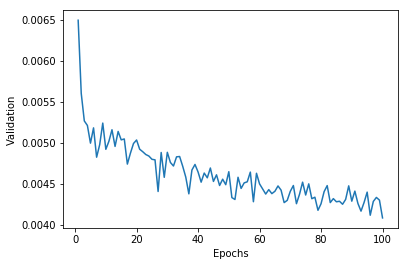

In [42]:
lines = plt.plot(range(1, len(smooth_mae_history) + 1 , ), smooth_mae_history)



plt.xlabel('Epochs')
plt.ylabel('Validation')

plt.show()

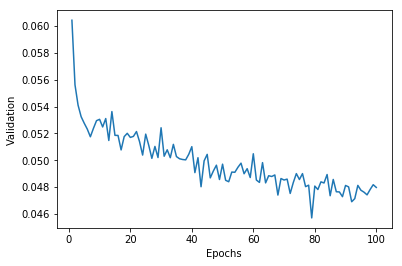

In [27]:
plt.plot(range(1, len(smooth_mae_new_history) + 1 ), smooth_mae_new_history)

plt.xlabel('Epochs')
plt.ylabel('Validation')

plt.show()

In [28]:
print(history.history)

{'loss': [0.006495064870786488, 0.005601751420839302, 0.005266307101013392, 0.00521132790039303, 0.004995397232498734, 0.005181781856285142, 0.004823966362023598, 0.004976689410619611, 0.005240178912380173, 0.0049202266599727785, 0.005018583480552105, 0.00515890488178087, 0.004955486295441176, 0.005137913879774013, 0.0050354981092693525, 0.005046498702331377, 0.004739771950956531, 0.004873389373084223, 0.004991313581631616, 0.005033933537599798, 0.0049214674568389205, 0.004890870257049578, 0.004856623684040879, 0.004838062720206911, 0.004798334366379606, 0.004791673687276064, 0.004405544559143617, 0.00488122975425559, 0.004578418051165312, 0.0048834467993644284, 0.004759800353323994, 0.004716332746784211, 0.004828108683760822, 0.004832339112434406, 0.004713718106797652, 0.004580973138296779, 0.0043767630156234345, 0.004667352929355956, 0.0047353170903967744, 0.00464310096957482, 0.004519290692498963, 0.004630384474513297, 0.004572475304681719, 0.004692048877590101, 0.004528231223209135

In [29]:
model = build_model()
model.fit(test_data, test_labels,
epochs=100, batch_size=16, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print(test_mse_score)

Epoch 1/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6927 - mean_absolute_error: 0.8208
Epoch 2/100
100/100 [==============================] - 0s 179us/step - loss: 0.4088 - mean_absolute_error: 0.6279
Epoch 3/100
100/100 [==============================] - 0s 297us/step - loss: 0.2594 - mean_absolute_error: 0.4952
Epoch 4/100
100/100 [==============================] - 0s 48us/step - loss: 0.1606 - mean_absolute_error: 0.3844
Epoch 5/100
100/100 [==============================] - 0s 91us/step - loss: 0.0924 - mean_absolute_error: 0.2842
Epoch 6/100
100/100 [==============================] - 0s 0us/step - loss: 0.0491 - mean_absolute_error: 0.1993
Epoch 7/100
100/100 [==============================] - 0s 48us/step - loss: 0.0242 - mean_absolute_error: 0.1320
Epoch 8/100
100/100 [==============================] - 0s 220us/step - loss: 0.0132 - mean_absolute_error: 0.0957
Epoch 9/100
100/100 [==============================] - 0s 155us/step - loss: 0.0080 - mean_abso

100/100 [==============================] - 0s 50us/step - loss: 0.0018 - mean_absolute_error: 0.0316
Epoch 73/100
100/100 [==============================] - 0s 0us/step - loss: 0.0016 - mean_absolute_error: 0.0311
Epoch 74/100
100/100 [==============================] - 0s 223us/step - loss: 0.0017 - mean_absolute_error: 0.0319
Epoch 75/100
100/100 [==============================] - 0s 60us/step - loss: 0.0015 - mean_absolute_error: 0.0302
Epoch 76/100
100/100 [==============================] - 0s 147us/step - loss: 0.0018 - mean_absolute_error: 0.0325
Epoch 77/100
100/100 [==============================] - 0s 83us/step - loss: 0.0018 - mean_absolute_error: 0.0318
Epoch 78/100
100/100 [==============================] - 0s 0us/step - loss: 0.0018 - mean_absolute_error: 0.0322
Epoch 79/100
100/100 [==============================] - 0s 161us/step - loss: 0.0019 - mean_absolute_error: 0.0335
Epoch 80/100
100/100 [==============================] - 0s 93us/step - loss: 0.0016 - mean_absolute_

In [30]:
print(test_data)

[[-1.11765165 -1.22238456 -0.95202863  0.0994422  -0.50426044 -0.63623792
  -1.09997489]
 [-0.15773222 -0.39756367 -0.95202863 -0.39776881 -0.50426044 -0.43475068
  -1.09997489]
 [ 0.62765641  0.26229304 -0.07660001  0.0994422  -0.50426044  0.57268548
   0.90911166]
 [ 1.15124883  1.41704229  0.79882862  0.59665321  0.05293342  1.05961296
   0.90911166]
 [-0.50679383 -1.05742038 -0.07660001 -1.39219083 -1.06145431 -1.61009288
   0.90911166]
 [-1.29218245 -1.38734873 -0.07660001 -0.89497982 -0.50426044 -1.92911433
  -1.09997489]
 [ 0.4531256  -0.72749202  0.79882862 -0.39776881 -1.06145431 -0.97204997
   0.90911166]
 [-1.64124406 -1.22238456 -0.07660001 -0.89497982  0.61012728 -1.08958419
   0.90911166]
 [-1.72850946 -1.05742038 -0.07660001 -1.39219083  0.61012728 -1.55972107
   0.90911166]
 [-1.46671326 -1.55231291 -1.82745726 -1.39219083 -1.06145431 -0.97204997
  -1.09997489]
 [-1.37944785 -1.88224127 -1.82745726 -0.39776881  0.61012728 -1.7444177
  -1.09997489]
 [-0.33226302 -2.21216

In [31]:
a = test_data[2]

In [32]:
print(a)

[ 0.62765641  0.26229304 -0.07660001  0.0994422  -0.50426044  0.57268548
  0.90911166]


In [33]:
model = build_model()

#Training on Entire Data
model.fit(train_data, train_labels, epochs = 80, batch_size = 16, verbose = 1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

Epoch 1/80
400/400 [==============================] - 0s 1ms/step - loss: 1.7531 - mean_absolute_error: 1.2975
Epoch 2/80
400/400 [==============================] - 0s 111us/step - loss: 0.5779 - mean_absolute_error: 0.7368
Epoch 3/80
400/400 [==============================] - 0s 75us/step - loss: 0.1333 - mean_absolute_error: 0.3365
Epoch 4/80
400/400 [==============================] - 0s 78us/step - loss: 0.0156 - mean_absolute_error: 0.1041
Epoch 5/80
400/400 [==============================] - 0s 74us/step - loss: 0.0058 - mean_absolute_error: 0.0573
Epoch 6/80
400/400 [==============================] - 0s 72us/step - loss: 0.0055 - mean_absolute_error: 0.0558
Epoch 7/80
400/400 [==============================] - 0s 82us/step - loss: 0.0053 - mean_absolute_error: 0.0548
Epoch 8/80
400/400 [==============================] - 0s 81us/step - loss: 0.0050 - mean_absolute_error: 0.0519
Epoch 9/80
400/400 [==============================] - 0s 104us/step - loss: 0.0050 - mean_absolute_error

400/400 [==============================] - 0s 77us/step - loss: 0.0042 - mean_absolute_error: 0.0471
Epoch 74/80
400/400 [==============================] - 0s 54us/step - loss: 0.0042 - mean_absolute_error: 0.0460
Epoch 75/80
400/400 [==============================] - 0s 40us/step - loss: 0.0043 - mean_absolute_error: 0.0458
Epoch 76/80
400/400 [==============================] - 0s 59us/step - loss: 0.0042 - mean_absolute_error: 0.0471
Epoch 77/80
400/400 [==============================] - 0s 64us/step - loss: 0.0041 - mean_absolute_error: 0.0455
Epoch 78/80
400/400 [==============================] - 0s 87us/step - loss: 0.0043 - mean_absolute_error: 0.0474
Epoch 79/80
400/400 [==============================] - 0s 88us/step - loss: 0.0042 - mean_absolute_error: 0.0464
Epoch 80/80
100/100 [==============================] - 0s 987us/step


In [34]:
model.predict(np.array([a,]))

array([[0.76928246]], dtype=float32)

In [35]:
test_labels[1]

0.66

In [36]:
model.predict(np.array([a,]))


array([[0.76928246]], dtype=float32)

In [37]:
test_labels[2]

0.78